# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
path="/content/drive/MyDrive/foodhub_order.csv"

df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
print(f"There are {df.shape[0]}, rows and {df.shape[1]} columns")

There are 1898, rows and 9 columns


#### Observations:
- There are 1898, rows and 9 columns in this data set


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- there are 5 numerical (4 integer and 1 floating point) and 4 object type columns
- rating is read as object type because the ratings not given are represented by the string "Not given"
- We could see that all the columns have same number of entries (1898). this means that there are no null values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Checking for missing values in the data by counting all null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- there are **no null values** (this is also verified in the info() in the above section)
- Not all the orders have ratings given.

In [7]:
# lets see what are the values that makes the column non numeric
df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
# lets also see how many "Not given" recods are there
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- There are **no missing data** in any of the columns. ie there are **no null values**
- the rating column has 736 records that have no ratings
- the ratings that are not present are represented by the string "Not given"



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- *cost_of_the_order*: On an average the cost of the order is 16.49 usd.
  50 percent of the orders cost less than the avarege cost of just 14.14 dollars.
- *rating*: about 40% of the ratings are not given. Of the ratings that are given, they are highly positive. Around 50% of the raings are 5 star. other raings are 3 star and 4 star
- *food_preparation_time*: Average time to prepare the food is 27.37 minutes. 50 percent of the orders take less than this average time at just 27 minutes to prepare
- *delivery_time*: Average delivery time is around 24 minutes. but 50% of the orders took more than 25 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# get the count of each unique ratings
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- we can see that there are 736 records that have the rating as "Not given"
- **i.e 736 orders are not rated**
- this means that about 38.7 percent of the orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**- Observations on *Order ID* .**





In [11]:
# check unique order ID
df['order_id'].nunique()

1898

Observations:
- there are total 1898 orders in the data set

**- observations on *customer ID* .**

In [12]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [13]:
#list the customers and the number of transactions they made
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

Observations:
- the 1898 orders are placed by **1200** customers
- customer number 52832 is the most loyal customer as he has placed the highest number of orders

**- observations on *Restaurant name* .**

In [14]:
# print the number of unique Restaurant Names in the data sets
df['restaurant_name'].nunique()

178

In [15]:
# which is the most popular restaurant
df['restaurant_name'].value_counts()[:1]

Shake Shack    219
Name: restaurant_name, dtype: int64

Observations:
- There are 178 unique restaurants in the dataset
- shake shack is the most popular restaurant
- 219 of the 1898 orders came from shake shack

**- observations on *Cuisine Type* .**

In [16]:
#list the number of unique cuisine types in the dataset
df['cuisine_type'].nunique()

14

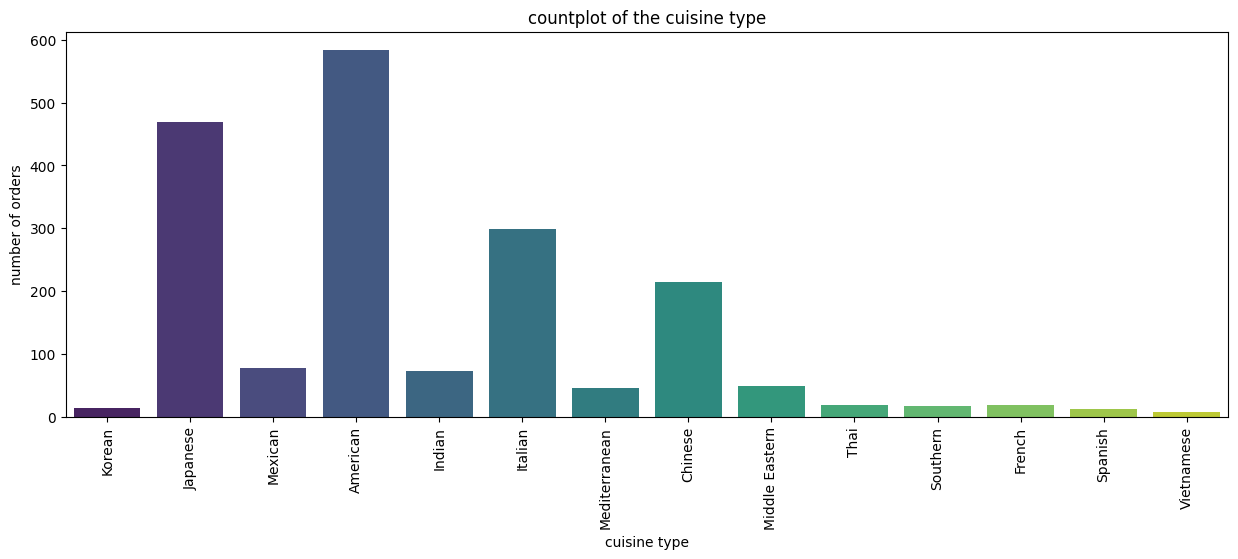

In [17]:
# count plot of cuisine type
plt.figure(figsize = (15,5))
plt.title("countplot of the cuisine type")
plt.xlabel("cuisine type")
plt.ylabel("number of orders")
sns.countplot(data=df,x="cuisine_type",hue="cuisine_type",palette="viridis")
plt.xticks(rotation=90)
plt.show()


Observations:
- there are 14 unique cuisine types in the dataset
- of which american cuisine is the most popular
- japanese and italian cuisines are the next most popular cuisines
- the least popular cuisine is Vietnamese cuisine
- Thai, french, southern, korean and spanish cuisines are also not very popular

**- observations on *Cost of the order* .**

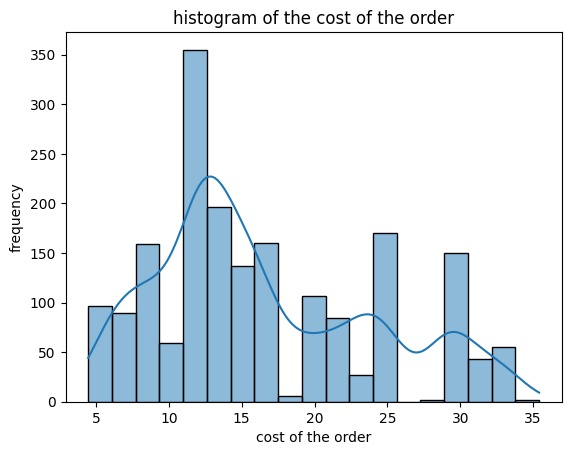

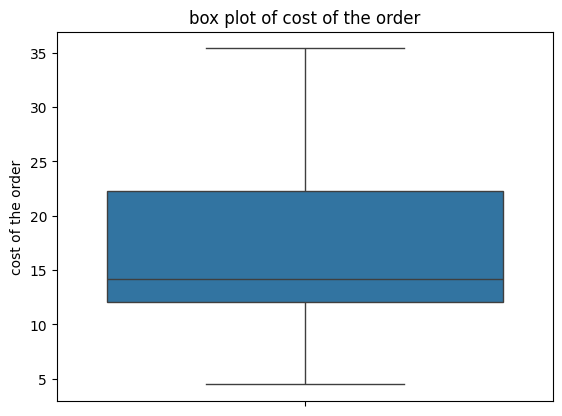

In [18]:
#histogram of the cost of the order

plt.title("histogram of the cost of the order")
plt.xlabel("cost of the order")
plt.ylabel("frequency")
sns.histplot(data=df,x="cost_of_the_order",kde=True)
plt.show()

#boxplot

sns.boxplot(data=df,y="cost_of_the_order")
plt.ylabel("cost of the order")
plt.title("box plot of cost of the order")
plt.show()


Observations:
- the distribution is skewed towards right
- majority (around 75 percent ) of the orders are less than or equal to 22 dollars
- we could see smaller peaks aroud 25 dollars and 30 dollars
- highest priced order is around 35 dollars
- and the lowest priced order is less than 5 dollars
- looking at box plot - there are no outliers present in the data
- median cost is less than 15 dollars

**- observations on *Day of the week* .**

In [19]:
#check the unique count on the day of the week
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

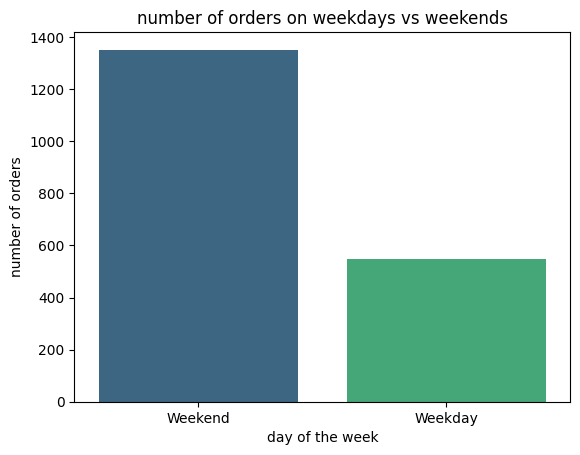

In [20]:
# count plot fo the das of the week
plt.title("number of orders on weekdays vs weekends")
plt.xlabel("day of the week")
plt.ylabel("number of orders")
sns.countplot(data=df,x="day_of_the_week",hue="day_of_the_week",palette="viridis")
plt.show()


Observations:
- as we can clearly see more than double the number of orders are placed on weekends compared to weekdays.
- 70 percent of the orders are placed on the weekends.
- it would be better to employ more delivery persons on the weekends rather than on the weekdays

**- observations on *Rating* .**

In [21]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

- of the total 1898 rows, 736 do not have a rating.
- other ratings are 5,4,3
- it is interesting to note that there are no bad ratings in the dataset

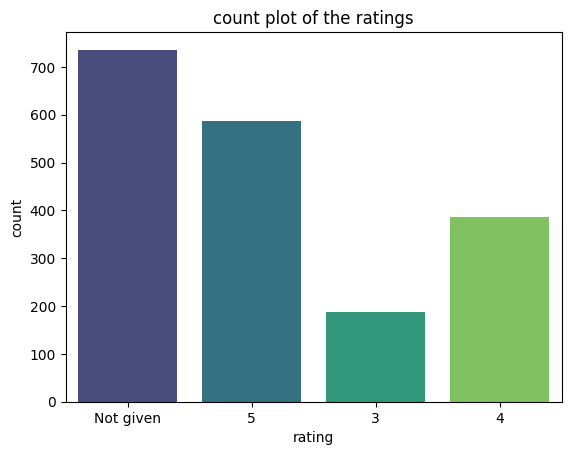

In [22]:
#count plot of ratings

plt.title("count plot of the ratings")
plt.xlabel("rating")
plt.ylabel("count")
sns.countplot(data=df,x="rating",hue="rating",palette="viridis")
plt.show()

Observations:
- about 40 percent of the orders are not rated (736/1898)
Of the orders that are rated-
- they all have relatively high ratings.
- There are no 1 or 2 star ratings
- Around 50% of the orders that are rated, have 5 star ratings - 588/(1898-736)


**- observations on *Food preparation time* .**

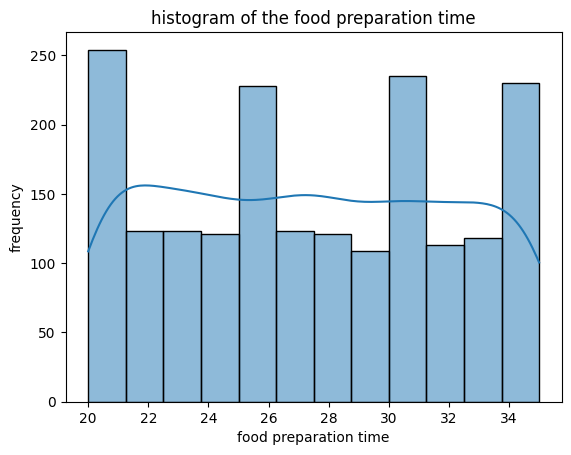

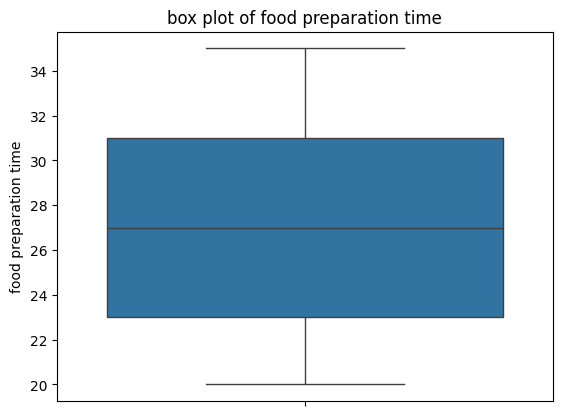

In [23]:
#histogram of the food preparation time

plt.title("histogram of the food preparation time")
plt.xlabel("food preparation time")
plt.ylabel("frequency")
sns.histplot(data=df,x="food_preparation_time",kde=True)
plt.show()

#boxplot of food preparation time

sns.boxplot(data=df,y="food_preparation_time")
plt.ylabel("food preparation time")
plt.title("box plot of food preparation time")
plt.show()

Observations:
- we could see a uniform distribution of the food preparation times accross the orders
- the average preparation time is around 27 minutes
- we could see that 50% of the orders took less than 27 minutes to prepare
- highest time it took to prepare the food was 35 minutes
- and lowest time it took to prepare the food was 20 minutes


**- observations on *Delivery time* .**

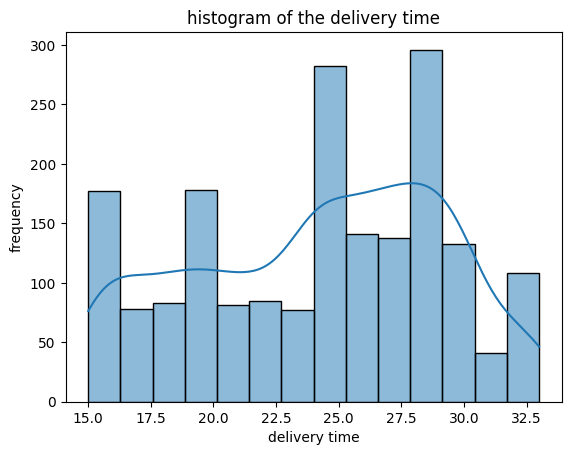

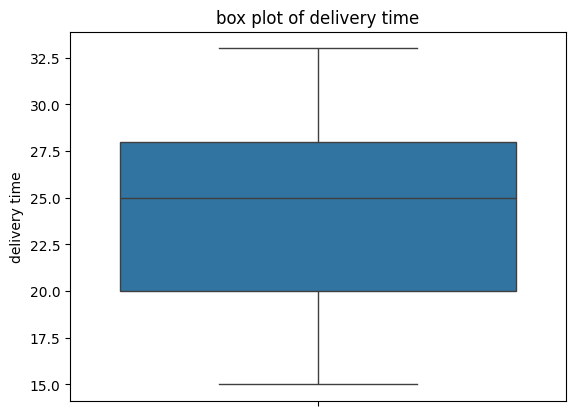

In [24]:
#histogram of the delivery time

plt.title("histogram of the delivery time")
plt.xlabel("delivery time")
plt.ylabel("frequency")
sns.histplot(data=df,x="delivery_time",kde=True)
plt.show()

#boxplot of the delivery time

sns.boxplot(data=df,y="delivery_time")
plt.ylabel("delivery time")
plt.title("box plot of delivery time")
plt.show()

Observations:
- the distribution peaks around 28 minutes
- highest delivery time is around 33 minutes and the lowest is about 15 minutes
- about 75% of the orders were delivered within 28 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
# Write the code here
df["restaurant_name"].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of number of orders in order are as below


1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Most popular cuisine
df.loc[df["day_of_the_week"]=="Weekend","cuisine_type"].value_counts()[:1]

American    415
Name: cuisine_type, dtype: int64

#### Observations:
- American cuisine is the most popular cuisine on the weekend
- 415 out of the total 1351 weekend orders are american (i.e 30 percent)


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# df["cost_of_the_order"]>20 returns a boolean series with true only where cost >20
# taking a sum will give you number of orders greater than 20
# number of orders costing more than 20$ / total number of orders


res = (
    (df["cost_of_the_order"]>20).sum() / df.shape[0]
) * 100


print(f"Percentage of orders that cost more than $20 : {round(res, 2)} %")

Percentage of orders that cost more than $20 : 29.24 %


#### Observations:
- Around 30 percent (i.e 29.24) of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# mean of delivery time
print(f'The mean order delivery time is : {round(df["delivery_time"].mean(),2)} mins')

The mean order delivery time is : 24.16 mins


#### Observations:
- the mean order delivery time is 24.16 minutes



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Top 3 customers
df["customer_id"].value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- the top customer is 52832 with 13 orders
- the second customer with the highest orders is 47440 with 10 orders
- the third customer is 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**- heatmap of the numerical variables to find the correlation among them**

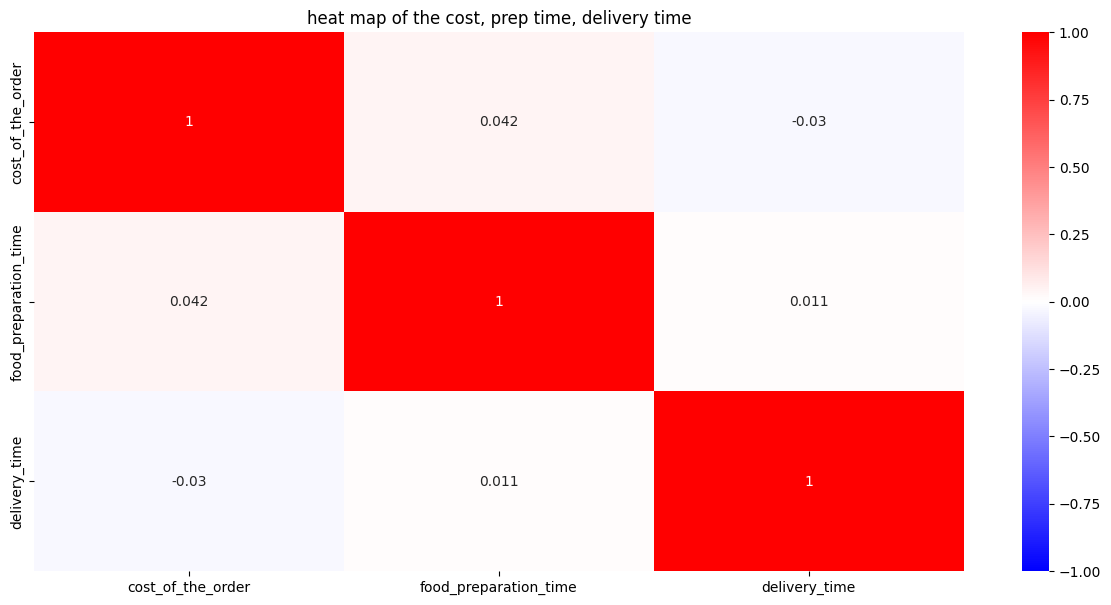

In [30]:
# heat map of the numerical values

plt.figure(figsize=(15,7))
numcol=["cost_of_the_order","food_preparation_time","delivery_time"]
sns.heatmap(df[numcol].corr(),annot=True,cmap="bwr",vmin=-1,vmax=1)
plt.title("heat map of the cost, prep time, delivery time")
plt.show()

Observations:
- there is very low correlation between the numerical variables

**- Cuisine Type vs other variables**

*- Cuisine Type vs Cost of order*

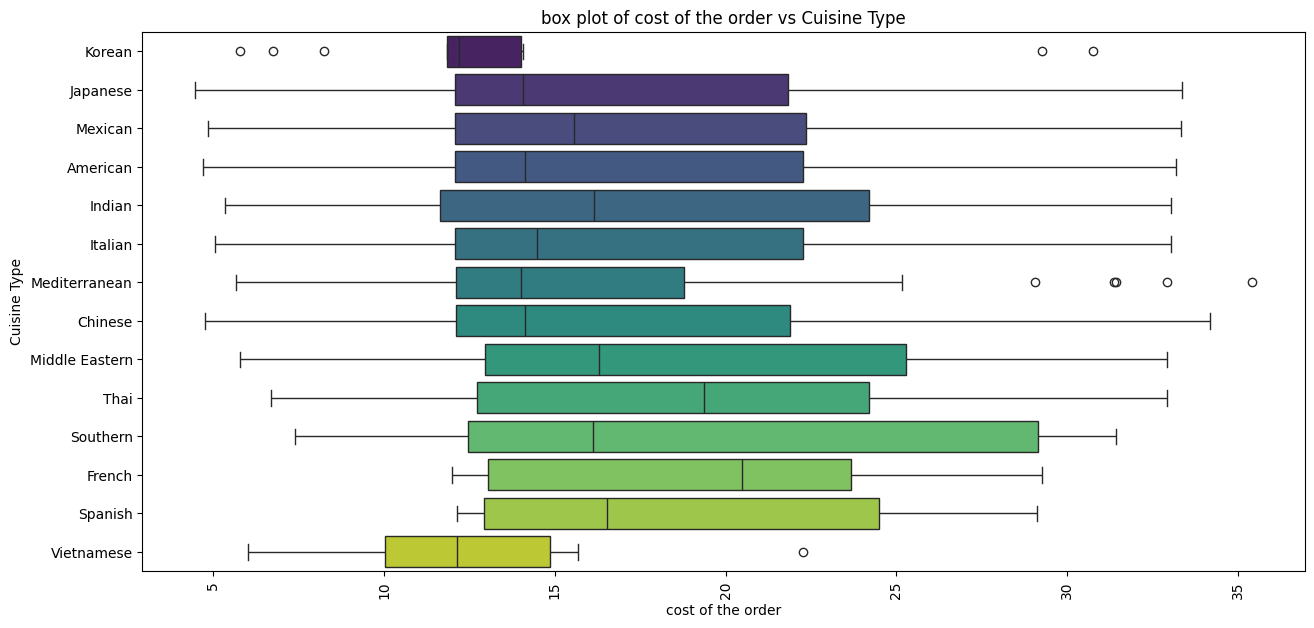

In [31]:
#boxplot showing the distribtuion of cost wrt to the cuisine

plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="cost_of_the_order",y="cuisine_type",hue="cuisine_type",palette="viridis")
plt.xlabel("cost of the order")
plt.ylabel("Cuisine Type")
plt.title("box plot of cost of the order vs Cuisine Type")
plt.xticks(rotation = 90)
plt.show()

Observations:
- Mediterranean cusine has the costliest item at around 35 dollars
- there are muliple outliers for Mediterranean, Korean and Vietnamese cuisines
- Japanese cuisine has the cheepest item less then 5 dollars
- for most cuisine type the median cost lies between 14 and 16 dollars
- 50 percent of the vietnamese dishes are cheaper than aproximately 12 dollars
- Korean dishes have the least spread if you ignore the oulier at 30 $
- 75 percent of the items in Korean Cuisine are cheaper then 15 dollars
- 25 percent of the southern cuisine costs more than aprox 30 dollars

*- Cuisine Type vs Food Preparation Time*

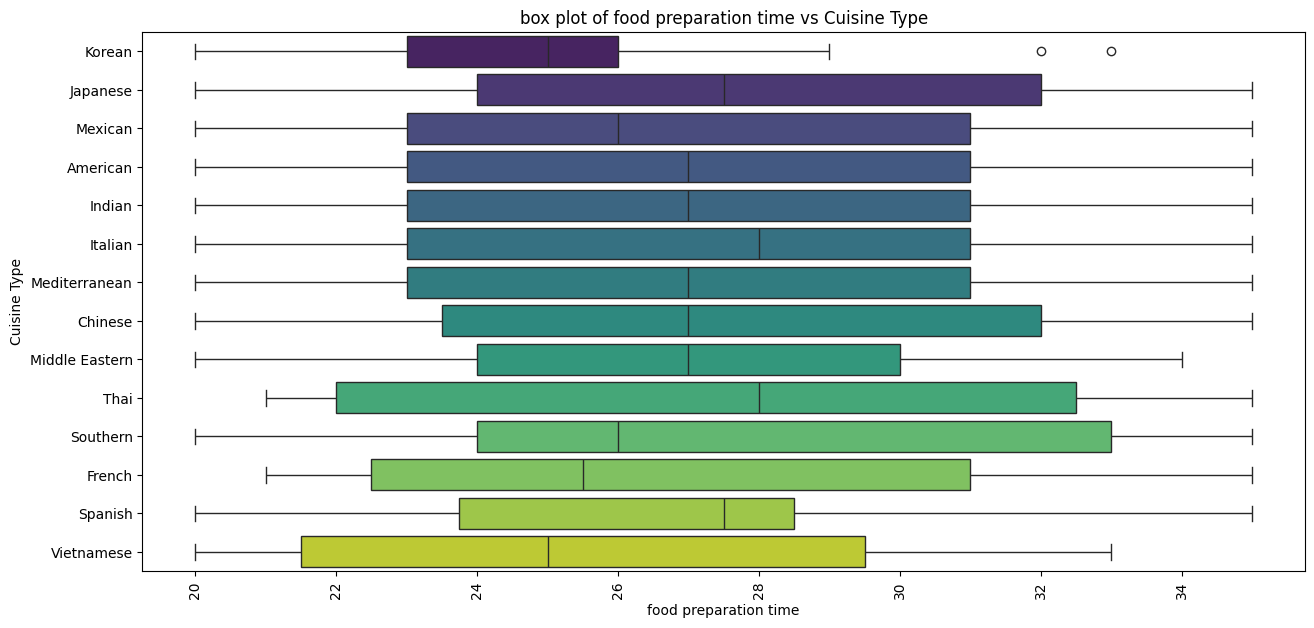

In [32]:
#boxplot showing the distribtuion of Prep time wrt to the cuisine

plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="food_preparation_time",y="cuisine_type",hue="cuisine_type",palette="viridis")
plt.xlabel("food preparation time")
plt.ylabel("Cuisine Type")
plt.title("box plot of food preparation time vs Cuisine Type")
plt.xticks(rotation = 90)
plt.show()

Observations:
- There are some outliers for Korean Cuisine when it comes to food prep time
- All cuisines except Korean, Vietnamese, and Middle Eastern have some items
that require up to a maximum of 35 minutes to prepare
- The median cooking times for all the cusines lie between 25 and 28 minutes
- 75 percent of Korean dishes need less than 26 minutes
- 25 percent of Vietnamese dishes need only 21 minutes
- All Cuisines require atleast 20 minutes preparation time



**- Delivery Time vs other variables**

*- Day of the week vs. Delivery Time*

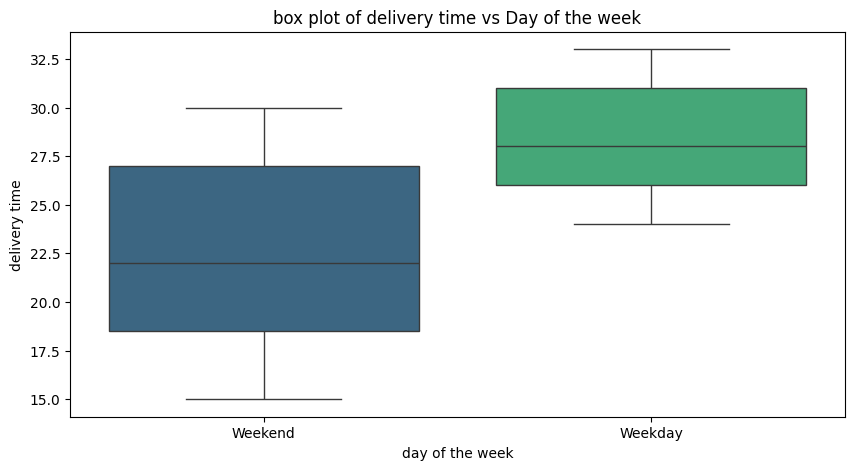

In [33]:
#boxplot showing the distribtuion of Delivery Time wrt to the day of the week

plt.figure(figsize=(10,5))
sns.boxplot(data=df,y="delivery_time",x="day_of_the_week",hue="day_of_the_week",palette="viridis")
plt.ylabel("delivery time")
plt.xlabel("day of the week")
plt.title("box plot of delivery time vs Day of the week")

plt.show()

Observations:
- it generally takes more time to deliver on a weekday. (this could be due to lower traffic)
- 50 percent of the orders on a weekday takes more than than 28 minutes
- 75 percent of the orders on a weekend takes less than 27 minutes
- minimum time to deliver on a weekday is 24 minutes
- the minimum time to deliver on a weekend is 15 minutes

**- Rating vs Other variables**

*- rating vs Food Preparation Time*

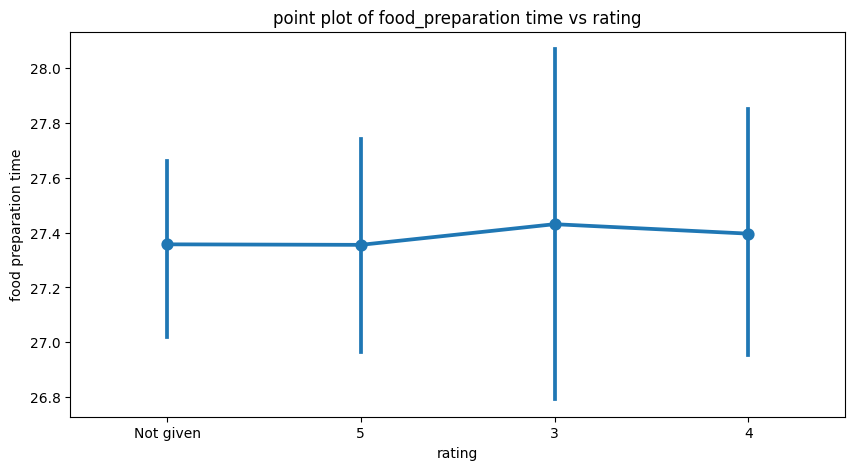

In [34]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df,y="food_preparation_time",x="rating")
plt.ylabel("food preparation time")
plt.xlabel("rating")
plt.title("point plot of food_preparation time vs rating")

plt.show()

Observations:
- the average food preparation time is similar for all the ratings - about 27 minutes
- this means that the rating does not really depend on the food preparation times
- rating 3 has the widest 95 percent confidence interval for the food preparation times

*- rating vs delivery time*

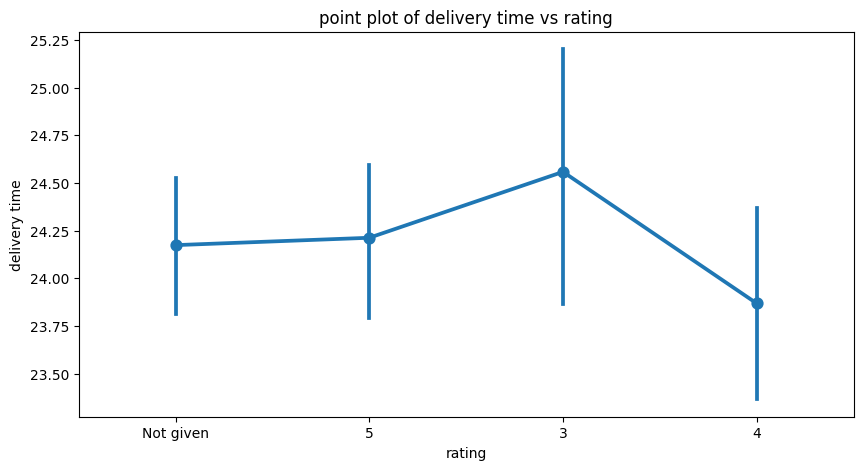

In [35]:
# lm plot
plt.figure(figsize=(10,5))
sns.pointplot(data=df,y="delivery_time",x="rating")
plt.ylabel("delivery time")
plt.xlabel("rating")
plt.title("point plot of delivery time vs rating")

plt.show()

Observations:
- mean delivery time is the lowest for rating 4
- mean delivery time is the highest for rating 3
- there is very only small variation in mean delivery times accross the various ratings
- this means that the delivery time does not affect the rating

 *- rating vs cost of the order*

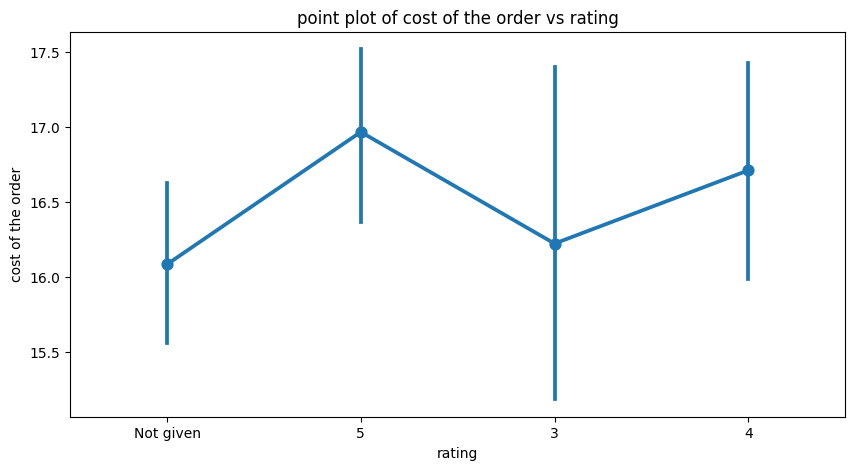

In [36]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df,y="cost_of_the_order",x="rating")
plt.ylabel("cost of the order")
plt.xlabel("rating")
plt.title("point plot of cost of the order vs rating")

plt.show()

Observations:
- 5 star rated items have higest cost on an average
- the 5 star rated items cost around 17 dollars on an average
- the cheapest average cost is for Non rated items
- second cheapest cost is for items rated 3
- higer rated food items are more costly. but the difference is negligible (less than 1 dollars)


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

- we need to create a new dataframe with only those records that have ratings

In [37]:
# dataframe where rating is given
dfrated=df.loc[df["rating"]!="Not given"].copy()
dfrated['rating']=dfrated['rating'].astype(int)

- list of restaurants that fulfills the criteria mentioned above

In [38]:
#filter returns all the records that satifies the condition, which means duplicate records as same restaurant can have muliple orders

(dfrated.groupby("restaurant_name").filter(lambda x : (x["rating"].count()>50) and (x["rating"].mean()>4))
  .groupby(["restaurant_name"])["rating"].mean()
  .sort_values(ascending=False))

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations:
there are 4 restaurants that satify the requirements they are

*   The Meatball Shop
*   Blue Ribbon Fried Chicken
*   Shake Shack
*   Blue Ribbon Sushi

*The question only ask to list the restaurants, not their ratings, neither does it ask to sort them*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

- method 1

In [39]:
# Orders with cost grater than 20. apply 25% to the cost and Orders with cost grater than 5. and less than or equal to 20.  apply 15%
rev20=df[df["cost_of_the_order"]>20].apply(lambda row:row["cost_of_the_order"]*0.25,axis=1).sum()
rev5=(df[(df["cost_of_the_order"]<=20) & (df["cost_of_the_order"]>5)]["cost_of_the_order"]*0.15).sum()
totrev=rev20+rev5

print(f"The net revenue generated by the company across all orders is: {round(totrev,2)}")

The net revenue generated by the company across all orders is: 6166.3


- method 2

In [40]:
#the function that can be applied to calculated the revenue
def rev(row):
  if row["cost_of_the_order"]>20:
    return row["cost_of_the_order"]*.25
  elif row["cost_of_the_order"]>5:
    return row["cost_of_the_order"]*.15
  else:
    return 0

In [41]:
print(f"The net revenue generated by the company across all orders is: {round(df.apply(rev,axis=1).sum(),2)}")

The net revenue generated by the company across all orders is: 6166.3


#### Observations:
- The net revenue generated by the company across all orders is: ***6166.30*** dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [42]:
# New column holding the total time
df["tottime"]=df['food_preparation_time']+df['delivery_time']


In [43]:
# df["tottime"]>60 returns a boolean, sum will return the number of orders that took more than 60 minutes
res = ((df["tottime"]>60).sum()/df.shape[0]) *100

print(f"Percentage of orders that took more than 60 minutes is : {round(res, 2)} %")

Percentage of orders that took more than 60 minutes is : 10.54 %


#### Observations:
- about 10.5 percent of the total orders took more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
#weekday
print(f"The average delivery time on a weekday is : {round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2)} mins")

#weekend
print(f"The average delivery time on a weekend is : {round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2)} mins")

The average delivery time on a weekday is : 28.34 mins
The average delivery time on a weekend is : 22.47 mins


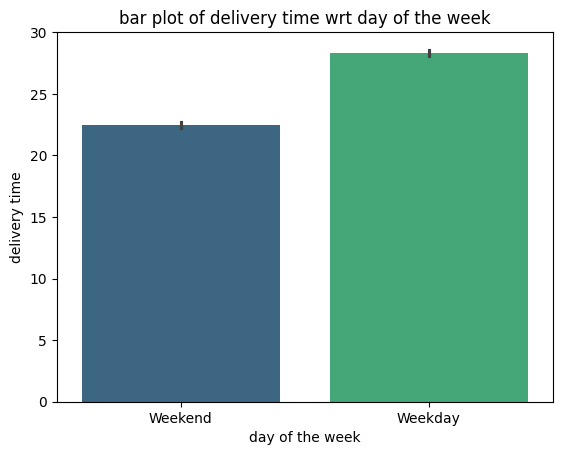

In [45]:
#bar plot of delivery time wrt day of the week
sns.barplot(data=df,y="delivery_time",x="day_of_the_week",hue="day_of_the_week",estimator="mean",palette="viridis")
plt.ylabel("delivery time")
plt.xlabel("day of the week")
plt.title("bar plot of delivery time wrt day of the week")
plt.show()

#### Observations:
- on an average, it takes more time to deliver on weekday than a weekend
- but the difference is small as it takes only aproximately 6 minutes more time to deliver on a weekday when compared to weekend

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions:**
We analyzed a dataset of 1898 rows with order information from 178 restaurants.
The data spanned over weekdays and weekends but it did not contain time related information. The main feature of interest here are the ratings.
The ratings are not a mandatory column hence around 40 percent of the orders are not rated

We have been able to conclude that -

1. 40 percent of the orders were not rated by the customers
2. Contrary to intuition, food preparation time or delivery time do not have much impact on the ratings given
3. On an average, more expensive items were rated higher than cheaper items
4. The number of  orders placed is higher on weekends when compared to weekdays
5. The most popular cuisine type on weekends is also American
6. The average delivery times are higher on a weekday when compared to weekends
7. Shake shack is the most popular restaurant (11 percent of the orders were placed to shake shack)
8. The most popular cuisine is american cuisine
9. majority (75%) of the orders were less than or equal to 22 dollars
10. only 30 percent of the orders cost more than 20 dollars
11. even the most frequent customer has ordered only 13 times
12. There are only 4 restaurants that satisfy the requirements for the promotional offer
13. 90 percent of the orders were delivered in less than an hour (delivery and preparation time)






### **Recommendations:**

1. Making the rating mandatory would give us better understand the customer experiance
2. Lesser numer of orders are placed on weekdays, hence providing promotional offers just on weekdays may increase the customer traffic.
3. Since approximately 70 percent of the transactions happen on a weekend, more delivery persons needs to be employed on the weekends
3. It takes more time to deliver on a weekday. This might be due to the higher traffic.
4. Since shake shack along with the meatball shop, and blue ribbon sushi are the most popular restaurants, employing more delivery personnel around that area would reduce the delivery time
5. Korean southern and spanish dishes are the least popular dishes on the weekends. So provideing promotional offers specific to these cuisine types would increase the traffic for those cuisine types as well
6. While american cuisine is the most popular cuisine type 70 percent of the orders are less than 20 dollars. We only charge 15 percent on transactions below 20 dollars. If we could introduce more expensive items under american cusine that could drive more traffic then it will improve our revenue figures

---